# 1 - Precios Promedio Nacionales Diarios

## Carga de datos

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Cargamos los datos
precios_promedio_2021 = pd.read_csv('./Data/Precios-Promedio-Nacionales-Diarios-2021.csv')
precios_promedio_2022 = pd.read_csv('./Data/Precios-Promedio-Nacionales-Diarios-2022.csv')
precios_promedio_2023 = pd.read_csv('./Data/Precios-Promedio-Nacionales-Diarios-2023.csv')

# Se renombra la ultima columna a Glp Cilindro Lbs.
precios_promedio_2021.rename(columns={'Unnamed: 7': 'Glp Cilindro Lbs.'}, inplace=True)
precios_promedio_2022.rename(columns={'Unnamed: 7': 'Glp Cilindro Lbs.'}, inplace=True)
precios_promedio_2023.rename(columns={'Unnamed: 7': 'Glp Cilindro Lbs.'}, inplace=True)

# Se unen los tres dataframes en uno solo
precios_promedio = pd.concat([precios_promedio_2021, precios_promedio_2022, precios_promedio_2023])

# Se eliminan las columnas que no se van a utilizar
precios_promedio = precios_promedio.drop(columns=['Bunker'])

In [141]:
print(precios_promedio.head())

      FECHA  Tipo de Cambio  Superior  Regular  Diesel  Glp Cilindro 25Lbs.  \
0  1-ene-21         7.79382     21.91    21.11   17.61                 99.0   
1  2-ene-21         7.79382     21.91    21.11   17.61                 99.0   
2  3-ene-21         7.79382     21.91    21.11   17.61                 99.0   
3  4-ene-21         7.79417     21.91    21.11   17.61                 99.0   
4  5-ene-21         7.79369     21.91    21.11   17.61                 99.0   

   Glp Cilindro Lbs.  
0               3.96  
1               3.96  
2               3.96  
3               3.96  
4               3.96  


In [142]:
print(precios_promedio.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 0 to 217
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FECHA                948 non-null    object 
 1   Tipo de Cambio       944 non-null    float64
 2   Superior             948 non-null    float64
 3   Regular              948 non-null    float64
 4   Diesel               948 non-null    float64
 5   Glp Cilindro 25Lbs.  948 non-null    float64
 6   Glp Cilindro Lbs.    948 non-null    float64
dtypes: float64(6), object(1)
memory usage: 59.2+ KB
None


In [143]:
print(precios_promedio.describe())

       Tipo de Cambio    Superior     Regular      Diesel  \
count      944.000000  948.000000  948.000000  948.000000   
mean         7.761312   32.364916   31.208502   28.503059   
std          0.059130    4.552204    4.221649    6.040627   
min          7.650900   21.910000   21.110000   17.610000   
25%          7.719990   28.790000   27.990000   23.090000   
50%          7.738020   33.300000   31.840000   27.980000   
75%          7.807210   35.572500   34.260000   33.750000   
max          7.930240   43.240000   40.500000   41.270000   

       Glp Cilindro 25Lbs.  Glp Cilindro Lbs.  
count           948.000000         948.000000  
mean            123.723745           4.949061  
std               8.442288           0.337845  
min              99.000000           3.960000  
25%             120.000000           4.800000  
50%             122.000000           4.880000  
75%             122.000000           4.880000  
max             147.000000           5.880000  


In [144]:
print(precios_promedio.isnull().sum())

FECHA                  0
Tipo de Cambio         4
Superior               0
Regular                0
Diesel                 0
Glp Cilindro 25Lbs.    0
Glp Cilindro Lbs.      0
dtype: int64


Index(['FECHA', 'Tipo de Cambio', 'Superior', 'Regular', 'Diesel',
       'Glp Cilindro 25Lbs.', 'Glp Cilindro Lbs.'],
      dtype='object')


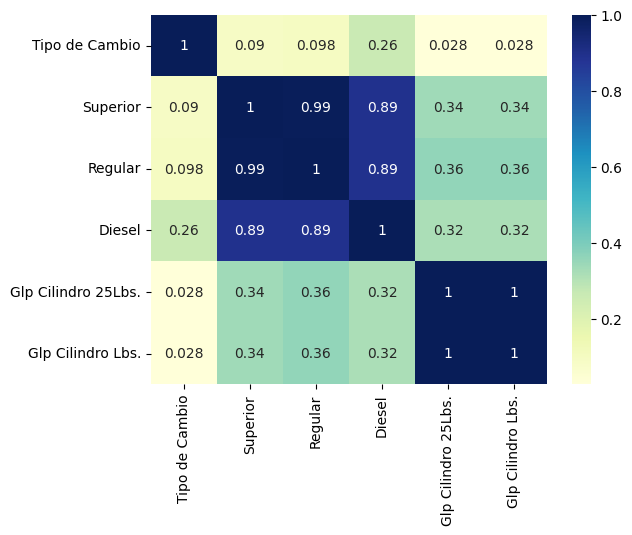

In [145]:
print(precios_promedio.columns)
cuantitativas = [
    "Tipo de Cambio",
    "Superior",
    "Regular",
    "Diesel",
    "Glp Cilindro 25Lbs.",
    "Glp Cilindro Lbs."
]

precios_promedio_cuantitativas = precios_promedio[cuantitativas]
cr = precios_promedio_cuantitativas.corr()
sns.heatmap(cr, annot=True, cmap="YlGnBu")
plt.show()


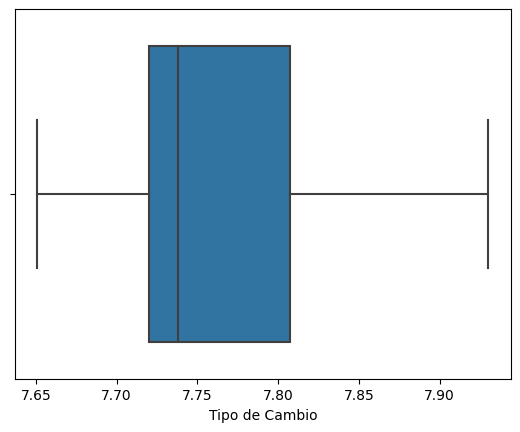

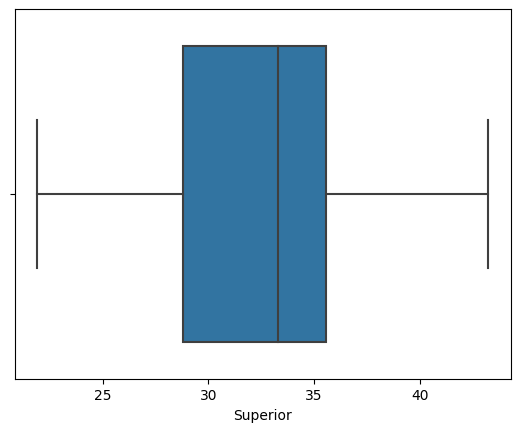

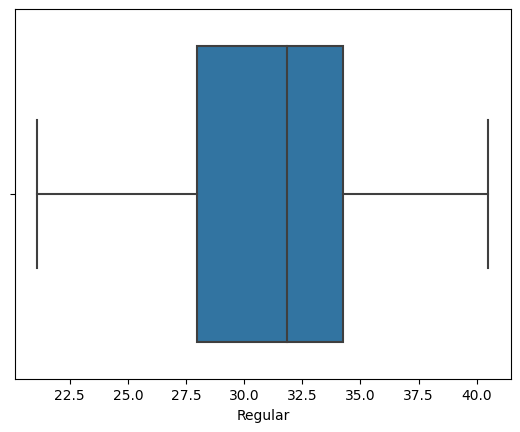

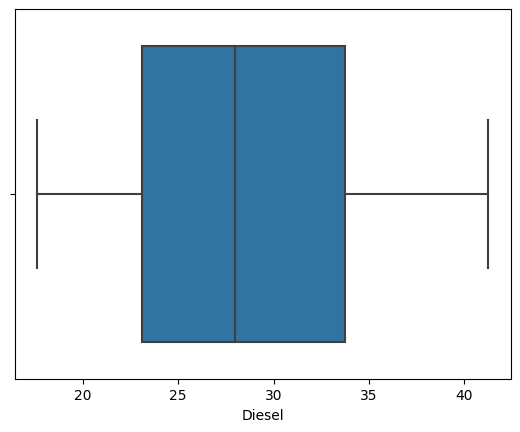

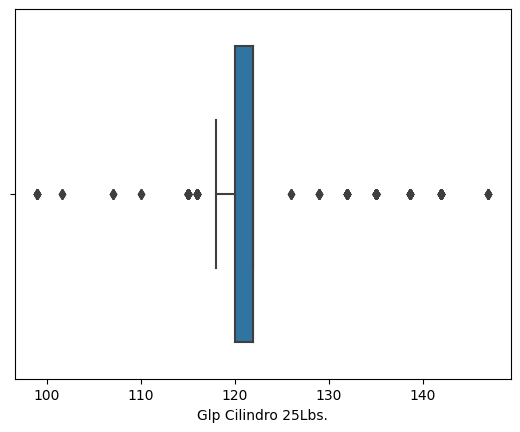

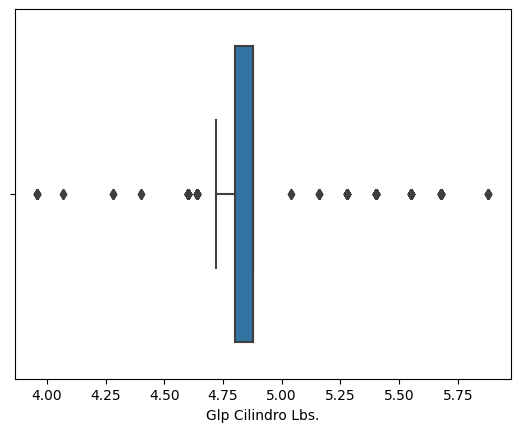

In [146]:
for col in cuantitativas:
    sns.boxplot(x = precios_promedio[col])
    plt.show()

0      1-01-21
1      2-01-21
2      3-01-21
3      4-01-21
4      5-01-21
        ...   
213    2-08-23
214    3-08-23
215    4-08-23
216    5-08-23
217    6-08-23
Name: FECHA, Length: 948, dtype: object


C:\Users\diego\AppData\Local\Temp\ipykernel_12284\1047430409.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grupo = precios_promedio.groupby(['AÑO']).mean()


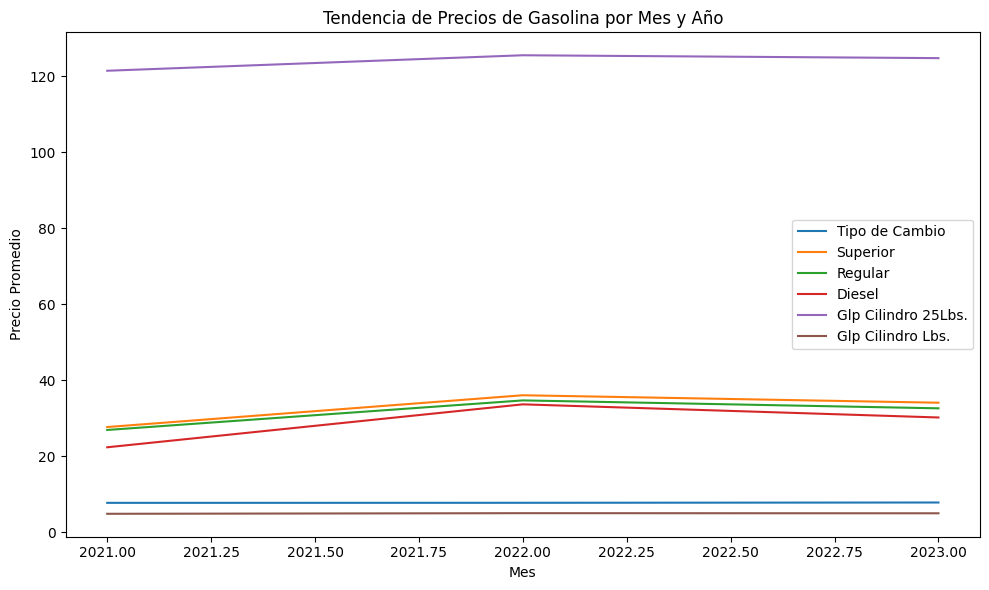

In [147]:
meses_dict = {
    'ene': '01', 'feb': '02', 'mar': '03', 'abr': '04', 'may': '05', 'jun': '06',
    'jul': '07', 'ago': '08', 'sep': '09', 'oct': '10', 'nov': '11', 'dic': '12'
}

def reemplazar_mes(fecha):
    partes = fecha.split('-')
    partes[1] = meses_dict[partes[1]]
    return '-'.join(partes)

precios_promedio['FECHA'] = precios_promedio['FECHA'].apply(reemplazar_mes)
print(precios_promedio['FECHA'])
    

precios_promedio['FECHA'] = pd.to_datetime(precios_promedio['FECHA'], format='%d-%m-%y')
precios_promedio['AÑO'] = precios_promedio['FECHA'].dt.year
precios_promedio['MES'] = precios_promedio['FECHA'].dt.month

grupo = precios_promedio.groupby(['AÑO']).mean()

tendencia = grupo[cuantitativas]
tendencia = tendencia.reset_index()

plt.figure(figsize=(10, 6))

for columna in cuantitativas:
    plt.plot(tendencia["AÑO"], tendencia[columna], label=columna)

plt.xlabel('Mes')
plt.ylabel('Precio Promedio')
plt.title('Tendencia de Precios de Gasolina por Mes y Año')
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\diego\AppData\Local\Temp\ipykernel_12284\822498385.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grupo = precios_promedio.groupby(['MES']).mean()


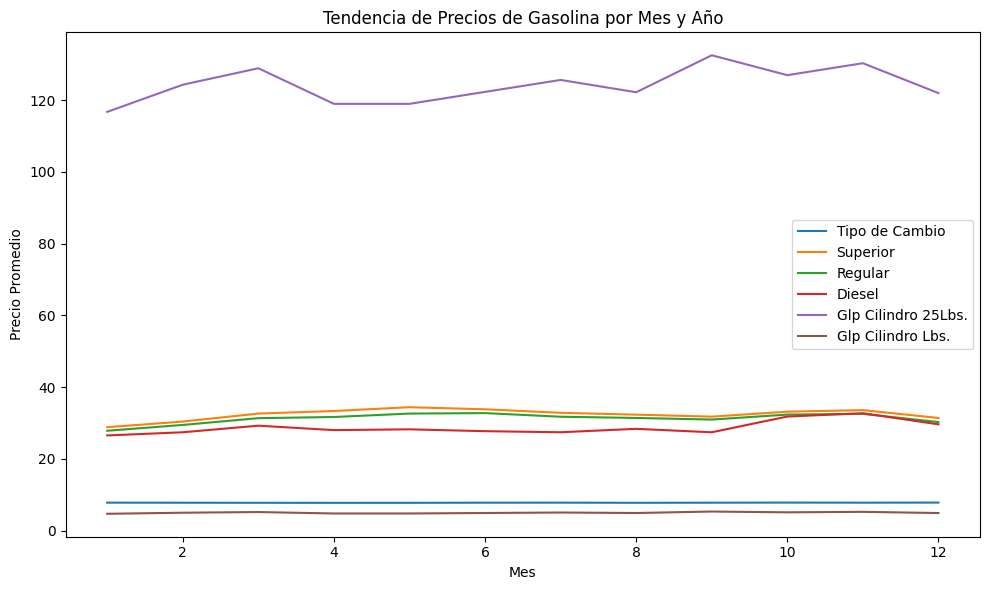

In [148]:
grupo = precios_promedio.groupby(['MES']).mean()

tendencia = grupo[cuantitativas]
tendencia = tendencia.reset_index()

plt.figure(figsize=(10, 6))

for columna in cuantitativas:
    plt.plot(tendencia["MES"], tendencia[columna], label=columna)

plt.xlabel('Mes')
plt.ylabel('Precio Promedio')
plt.title('Tendencia de Precios de Gasolina por Mes y Año')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Cargamos los datos
consumo = pd.read_csv('./Data/CONSUMO.csv')

importacion = pd.read_csv('./Data/IMPORTACION.csv')

print("Info de consumo:")

print(consumo.head())
print(consumo.info())
print(consumo.describe())




In [ ]:
print("Info de importacion:")

print(importacion.head())
print(importacion.info())
print(importacion.describe())

## Análisis exploratorio